# K Nearest Neigbors (KNN) - Classification

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
try:
    sns.set_theme()  # Use seaborn themes with matplotlib (newer versions)
except AttributeError:  # Fallback for older seaborn versions
    sns.set()

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn for KNN Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
def clean_column_header(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

# calling the function
df = clean_column_header(df)

In [6]:
df

,user_id,gender,age,estimatedsalary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


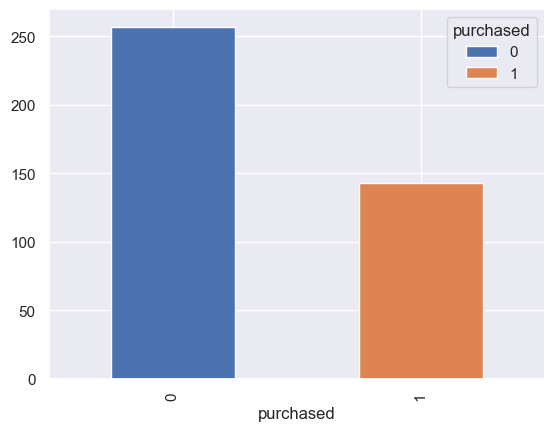

In [7]:
# check the data proportion 
pd.crosstab(df['purchased'], df['purchased']).plot(kind='bar', stacked=True)
plt.show()

In [8]:
pd.crosstab(df['purchased'], df['purchased'], normalize=True)*100

purchased,0,1
purchased,,
0,64.25,0.00
1,0.00,35.75


In [9]:
# drop the user Id 
df.drop(columns=['user_id'], inplace=True)

In [10]:
df

,gender,age,estimatedsalary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [11]:
# Convert the dummy data using the get_dummy 
df = pd.get_dummies(df, dtype='int64', drop_first=True)

In [12]:
df

,age,estimatedsalary,purchased,gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [13]:
df.columns.to_list()

['age', 'estimatedsalary', 'purchased', 'gender_Male']

In [14]:
df.rename(columns =({'gender_Female': 'female', 'gender_Male': 'male'}), inplace=True)

In [15]:
df

,age,estimatedsalary,purchased,male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [16]:
df.describe()

,age,estimatedsalary,purchased,male
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.490000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


In [17]:
df.corr

<bound method DataFrame.corr of      age  estimatedsalary  purchased  male
0     19            19000          0     1
1     35            20000          0     1
2     26            43000          0     0
3     27            57000          0     0
4     19            76000          0     1
..   ...              ...        ...   ...
395   46            41000          1     0
396   51            23000          1     1
397   50            20000          1     0
398   36            33000          0     1
399   49            36000          1     0

[400 rows x 4 columns]>

<Axes: >

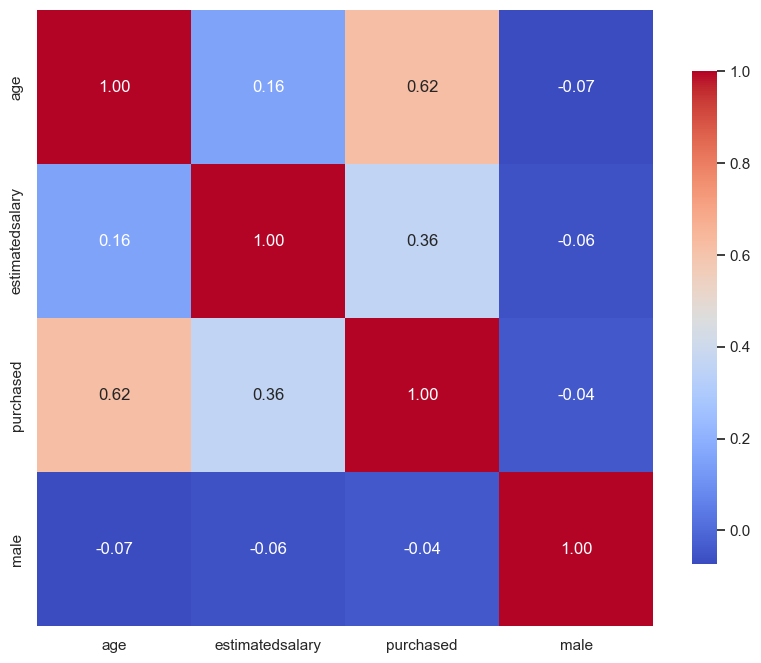

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [19]:
df

,age,estimatedsalary,purchased,male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = scaler.fit_transform(df[['age', 'estimatedsalary']])

In [21]:
df_sc = pd.DataFrame(data=df_sc, columns=['age', 'estimatedsalary'])
df_sc.head()

,age,estimatedsalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [22]:
# combined the data
df_sc = pd.concat([df_sc, df['purchased'], df['male']], axis=1)

In [25]:
df_sc 

,age,estimatedsalary,purchased,male
0,-1.781797,-1.490046,0,1
1,-0.253587,-1.460681,0,1
2,-1.113206,-0.785290,0,0
3,-1.017692,-0.374182,0,0
4,-1.781797,0.183751,0,1
...,...,...,...,...
395,0.797057,-0.844019,1,0
396,1.274623,-1.372587,1,1
397,1.179110,-1.460681,1,0
398,-0.158074,-1.078938,0,1


In [26]:
y = df_sc['purchased']
X = df_sc.drop('purchased', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [29]:
X_train.head()

,age,estimatedsalary,male
269,0.223978,-0.256722,1
389,0.988083,-1.020209,0
232,0.223978,1.094061,1
89,-0.253587,-0.579736,1
236,0.223978,-0.374182,1


##  KNN Classification with Sklearn

In [33]:
# KNeighborsClassifier is already imported and available for use.
KNN_classifier = KNeighborsClassifier(n_neighbors=20)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [34]:
# Predicting the Test set probabilities and classes
y_hat      = KNN_classifier.predict(X_test)
y_hat_probs = KNN_classifier.predict_proba(X_test)[:,1] 

In [35]:
np.round(KNN_classifier.predict_proba(X_test),3)[:5]

array([[0.85, 0.15],
       [1.  , 0.  ],
       [0.2 , 0.8 ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [36]:
np.max(y_hat_probs)

0.95

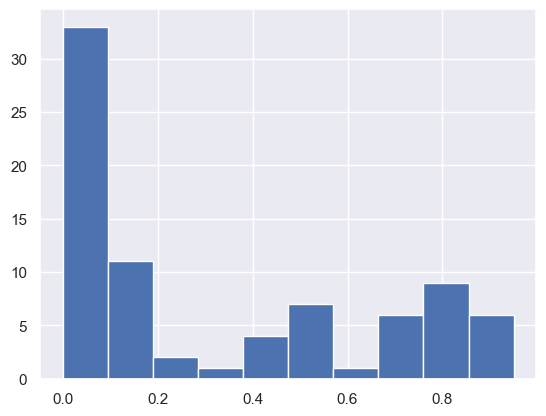

In [37]:
plt.hist(y_hat_probs)
plt.show()

In [38]:
y_hat_30 = np.where(y_hat_probs>0.3,1,0)
y_hat_70 = np.where(y_hat_probs>0.7,1,0)

In [39]:
# let's put all the predictions together in a data frame.
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_70':y_hat_70})
df_predictions.head()

,y_test,y_hat_probs,y_hat_30,y_hat_70
220,0,0.15,0,0
4,0,0.00,0,0
230,1,0.80,1,1
55,0,0.00,0,0
312,0,0.00,0,0


## Performance metrics:

In [40]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5, weights='uniform'):
    knn= KNeighborsClassifier(n_neighbors=K, weights=weights)
    knn.fit(X_train, y_train)
    probs = knn.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled
 

In [47]:
my_KNN_report(X_train, y_train, X_test, y_test, K=5, threshold=0.7, weights='uniform')

-----------------------------------------
Accuracy  = 0.8875
Error_rate  = 0.1125
Precision = 0.93
Recall    = 0.78
f1_score  = 0.85
MCC       = 0.77
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,46,2
Actual : positive,7,25


In [48]:
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Sample dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.2, random_state=8)

model = LinearRegression()

# Create custom scorer (since lower MAE is better, set greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

scores = cross_val_score(model, X, y, scoring=mae_scorer, cv=5)
print("MAE scores:", scores)


MAE scores: [-0.15751493 -0.1742305  -0.11879888 -0.13280299 -0.18904409]


No Skill: ROC AUC=0.500
KNN: ROC AUC=0.942


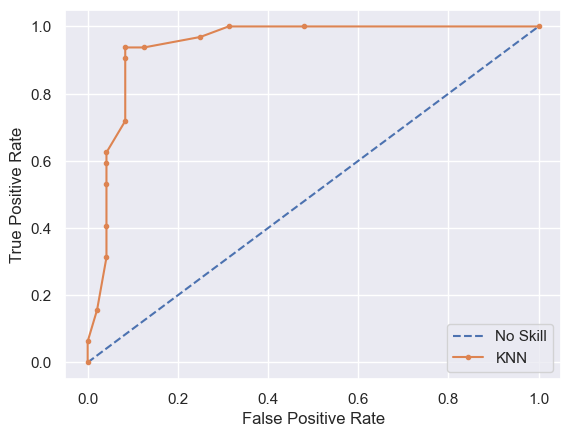

In [49]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [1 for i in range(len(y_test))]
lr_probs = KNN_classifier.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '